In [ ]:
import random
import pylab
random.seed()
real_rand_vars=[random.random() for val in range(10)]
pylab.hist(real_rand_vars, 10)
pylab.xlabel('Num range')
pylab.ylabel('Count') 
pylab.show()

In [ ]:
import os
from wordcloud import WordCloud
# with open("a_new_hope.txt") as f:  # naturally this only works if 
#     lines = f.readlines() 
# text = "".join(lines)

In [3]:
text = """Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam,
quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo
consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse
cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non
proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
"""

In [4]:
words = WordCloud(width=1000, height=1000, font_path='/Library/Fonts/Arial.ttf')  # On pcoms001 you could use: 
# words = WordCloud(width=1000, height=1000, font_path='/usr/share/fonts/truetype/didot/GFSDidotItalic.otf')   # Use your bash skills to check what other fonts are available 
words.generate(text)

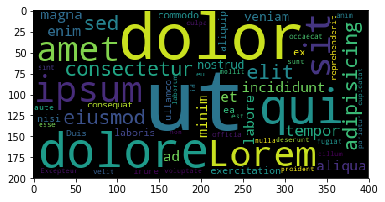

In [5]:
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
# plt.show()

## 1

In [6]:
import random, pylab
from nltk.corpus import brown, reuters, inaugural, webtext, gutenberg
from nltk.stem.snowball import EnglishStemmer
import matplotlib.pyplot as plt

In [7]:
def word_count_raw(corpora):
    word_counts = []
    for corpus in corpora:
        total_words = []
        for file in corpus.fileids():
            # use set to only keep unique words
            sub_uniq_words = set(corpus.words(file))
            for word in sub_uniq_words:
                total_words.append(word)

    unique_words = set(total_words)
    word_counts.append(len(unique_words))

    return word_counts


def preprocess(tokens):
    stemmer = EnglishStemmer()
    sub_result = []
    result = []
    for token in tokens:
        sub_result.append(stemmer.stem(token))
    for token in sub_result:
        result.append(token.lower())

    return result


def word_count_preprocessed(corpora):
    word_counts = []
    for corpus in corpora:
        total_words = []
        for file in corpus.fileids():
            # use set to only keep unique words
            sub_uniq_words = set(preprocess(corpus.words(file)))
            for word in sub_uniq_words:
                total_words.append(word)

        unique_words = set(total_words)
        word_counts.append(len(unique_words))

    return word_counts


corpora = [brown, reuters, inaugural, webtext, gutenberg]
t_corpora = ['brown', 'reuters', 'inaugural', 'webtext', 'gutenberg']
raw = word_count_raw(corpora)
preprocessed = word_count_preprocessed(corpora)

In [ ]:
X = t_corpora
plt.bar(X, raw, color='b', width=0.25, label='raw texts')
plt.bar(X, preprocessed, color='g', width=0.25, label='preprocessed texts')
plt.legend()
plt.xlabel('Corpus')
plt.ylabel('Amount of unique words')
plt.show()

## 2

In [8]:
import nltk.tag.stanford as st
import nltk
from nltk.stem.snowball import EnglishStemmer
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def preprocess(tokens):
    stemmer = EnglishStemmer()
    sub_result = []
    result = []
    for token in tokens:
        sub_result.append(stemmer.stem(token))
    for token in sub_result:
        result.append(token.lower())

    return result


dir_ = '../../datasets/stanford-ner-2018-02-27/'
arg1 = dir_ + 'classifiers/english.all.3class.distsim.crf.ser.gz'
arg1 = dir_ + 'classifiers/english.muc.7class.distsim.crf.ser.gz'
arg2 = dir_ + 'stanford-ner.jar'
text = '../../datasets/lab5/45354.txt'

tagger = st.StanfordNERTagger(arg1, arg2)
tokenized_text = nltk.word_tokenize(open(text).read())
preprocessed = preprocess(tokenized_text)
result = tagger.tag(tokenized_text)

locations = []

for (word, tag) in result:
    if tag == "LOCATION":
        locations.append(word)

counted = Counter(locations)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [10]:
counted

Counter({"'s": 1,
         '1500': 1,
         '18th': 1,
         '2nd': 1,
         'ALEXANDRIA': 3,
         'ANZAC': 2,
         'AUCKLAND': 5,
         'Abassia': 1,
         'Abdin': 1,
         'Achi': 5,
         'Aden': 5,
         'Africa': 4,
         'Aghala': 1,
         'Albany': 6,
         'Aleppo': 1,
         'Alexandra': 2,
         'Alexandria': 19,
         'America': 2,
         'Anafarta': 7,
         'Anzac': 49,
         'Arawa': 2,
         'Argonne': 1,
         'Ari': 1,
         'Army': 1,
         'Asia': 2,
         'Asma': 3,
         'Assyrian': 1,
         'Atlantic': 1,
         'Auckland': 69,
         'Aucklands': 1,
         'Australia': 20,
         'Australian': 1,
         'Austria': 2,
         'Awapuni': 1,
         'Awarua': 1,
         'Baba': 9,
         'Bagatelle': 1,
         'Bair': 2,
         'Balah': 1,
         'Balkan': 1,
         'Baluchi': 2,
         'Baluchistan': 1,
         'Battalion': 20,
         'Battalions': 2,
        

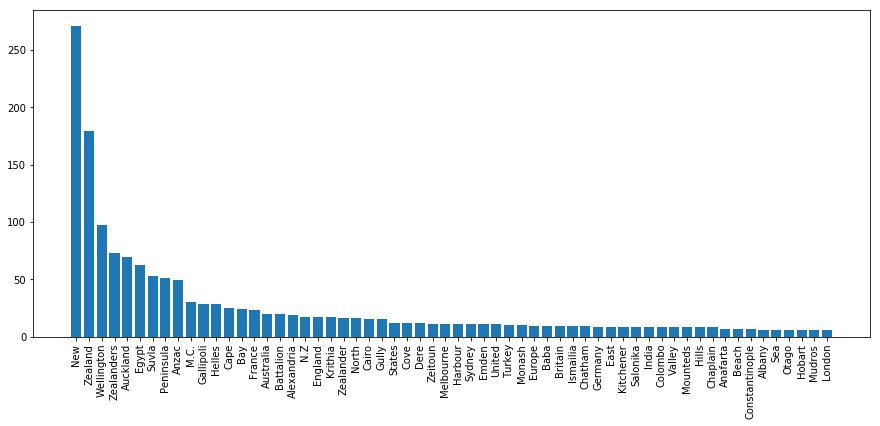

In [91]:
import collections
# reduce len(data)
amt = 60
# sort by value
ls = list(counted.items())
ls.sort(key=lambda x: x[1], reverse=True)
data = collections.OrderedDict(ls[:amt])

fig, axs = plt.subplots(1, 1, figsize=(15, 6))#, figsize=(9, 3), sharey=True)

axs.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.xticks(rotation=90)
plt.show()

In [67]:
ls[0][1]

1

In [68]:
import statistics as s
s.mean([1,2])

1.5

In [69]:
s.mean(list(data.values()))

5.943786982248521

In [80]:
d = list(counted.items())[:100]
d.sort(key=lambda x: x[1], reverse=True)
d

[('New', 271),
 ('Zealand', 179),
 ('Wellington', 97),
 ('Zealanders', 73),
 ('Auckland', 69),
 ('Egypt', 62),
 ('Peninsula', 51),
 ('Anzac', 49),
 ('M.C.', 30),
 ('Gallipoli', 28),
 ('Bay', 24),
 ('France', 23),
 ('Australia', 20),
 ('Battalion', 20),
 ('Alexandria', 19),
 ('N.Z', 17),
 ('England', 17),
 ('Zealander', 16),
 ('North', 16),
 ('Zeitoun', 11),
 ('Melbourne', 11),
 ('Harbour', 11),
 ('Sydney', 11),
 ('Emden', 11),
 ('Europe', 9),
 ('Baba', 9),
 ('Britain', 9),
 ('Germany', 8),
 ('East', 8),
 ('Kitchener', 8),
 ('Salonika', 8),
 ('India', 8),
 ('Albany', 6),
 ('Sea', 6),
 ('Otago', 6),
 ('Hobart', 6),
 ('AUCKLAND', 5),
 ('Achi', 5),
 ('West', 5),
 ('WELLINGTON', 4),
 ('Park', 4),
 ('Tasmania', 4),
 ('DUNEDIN', 3),
 ('Western', 3),
 ('Lord', 3),
 ('Wales', 3),
 ('Island', 3),
 ('CHRISTCHURCH', 2),
 ('Rhine', 2),
 ('Rhineland', 2),
 ('Heliopolis', 2),
 ('America', 2),
 ('Southern', 2),
 ('Brigade', 2),
 ('Palestine', 2),
 ('Scotland', 2),
 ('Belgium', 2),
 ('Pacific', 2),
 ('

In [87]:
data

{'Achi': 5,
 'Aden': 5,
 'Africa': 4,
 'Albany': 6,
 'Alexandria': 19,
 'Anafarta': 7,
 'Anzac': 49,
 'Auckland': 5,
 'Australia': 20,
 'Baba': 9,
 'Battalion': 20,
 'Bay': 24,
 'Beach': 7,
 'Beit': 5,
 'Britain': 9,
 'Cairo': 15,
 'Cape': 25,
 'Chailak': 4,
 'Chaplain': 8,
 'Chatham': 9,
 'Cheshire': 4,
 'Chocolate': 6,
 'Chunuk': 5,
 'Cocos': 4,
 'Colombo': 8,
 'Constantinople': 7,
 'Cove': 12,
 'Dere': 12,
 'Earnest': 5,
 'East': 8,
 'Egypt': 62,
 'Emden': 11,
 'England': 17,
 'Europe': 9,
 'France': 23,
 'Gallipoli': 28,
 'Germany': 8,
 'Gully': 15,
 'Harbour': 11,
 'Helles': 28,
 'Hills': 8,
 'Hobart': 6,
 'India': 8,
 'Islands': 4,
 'Ismailia': 9,
 'Kantara': 4,
 'Kitchener': 8,
 'Krithia': 17,
 'Kubri': 5,
 'Lake': 4,
 'Lala': 4,
 'Lancashires': 4,
 'London': 6,
 'M.C.': 30,
 'M.M.': 4,
 'Malta': 4,
 'Mediterranean': 4,
 'Melbourne': 11,
 'Monash': 10,
 'Mounteds': 8,
 'Mudros': 6,
 'N.Z': 17,
 'New': 271,
 'North': 16,
 'Otago': 6,
 'Park': 4,
 'Peninsula': 51,
 'Russia': 4,
 '